In [2]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

sns.set_style('white')

In [3]:
# Read fusions.
col_names = ['chromosome', 'start', 'end', 'sample', 
             'n_reads', 'n_reads_unique', 'n_reads_total', 'sb_position']

insertions = pd.read_csv('../data/processed/sanger/fusion-finder/fus.txt',
                         sep='\t', header=None, names=col_names)
insertions = insertions.loc[insertions['chromosome'] != '1']

# Annotate with features.
feature_map = {
    'T2onc:0-200': 'IR/DR1',
    'T2onc:450-650': 'SA',
    'T2onc:1400-1600': 'En2SA',
    'T2onc:2000-2200': 'IR/DR2',
    'T2onc:900-1100': 'SD'
}

insertions['sb_feature'] = insertions['sb_position'].map(feature_map)

In [5]:
from nbsupport.util import fetch_biomart_genes_mm10

mmu_genes = fetch_biomart_genes_mm10()

def _overlapping_genes(row, genes):
    overlap = genes.search(row.chromosome, row.start, row.end)
    return set(overlap['gene_name'])

insertions['genes'] = insertions.apply(
    lambda r: ';'.join(_overlapping_genes(r, mmu_genes)), axis=1)
insertions.ix[insertions['genes'] == '', 'genes'] = np.nan

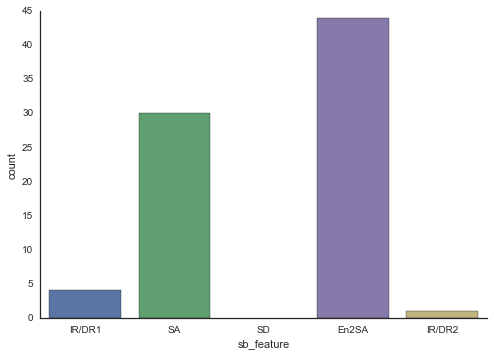

In [6]:
fig, ax = plt.subplots()
sns.countplot(data=insertions, x='sb_feature',
              order=['IR/DR1', 'SA', 'SD', 'En2SA', 'IR/DR2'], ax=ax);
sns.despine()

fig.savefig('../reports/figures/fig_sx_fusion_finder_site.pdf', bbox_inches='tight')

In [23]:
(insertions.groupby('genes')
           ['sample'].nunique()
           .sort_values(ascending=False)
           .head(n=15).to_frame('n_sample').head(n=5))

,n_sample
genes,
Cblb,5
Sos1,2
Nfrkb,2
Dlx3,2
Txndc11,1


In [28]:
pd.read_csv('../data/processed/sanger/star/insertions.txt', sep='\t').query('gene_name == "Jak1"')

,id,seqname,position,strand,support_junction,support_spanning,support,feature_name,feature_strand,feature_type,ffpm,ffpm_junction,ffpm_spanning,gene_id,gene_name,gene_strand,novel_transcript,orientation,sample,transposon_anchor
68,TAPJ102_5c.INS_173,4,101197981,-1,1,0,1,SD,1,SD,0.011626,0.011626,0.000000,ENSMUSG00000028530,Jak1,-1.0,NaN,sense,TAPJ102_5c,1043
1560,TAPJ49_1a.INS_678,4,101193864,-1,522,0,522,SD,1,SD,7.097971,7.097971,0.000000,ENSMUSG00000028530,Jak1,-1.0,NaN,sense,TAPJ49_1a,1043
1579,TAPJ49_1a.INS_680,4,101197981,-1,22,1,23,SD,1,SD,0.312746,0.299148,0.013598,ENSMUSG00000028530,Jak1,-1.0,NaN,sense,TAPJ49_1a,1043
1593,TAPJ49_1a.INS_682,4,101198915,-1,9,0,9,SD,1,SD,0.122379,0.122379,0.000000,ENSMUSG00000028530,Jak1,-1.0,NaN,sense,TAPJ49_1a,1043
1671,TAPJ49_1a.INS_676,4,101189203,-1,2,0,2,SD,1,SD,0.027195,0.027195,0.000000,ENSMUSG00000028530,Jak1,-1.0,NaN,sense,TAPJ49_1a,1043
2054,TAPJ49_1a.INS_74,4,101265041,-1,1,0,1,SA,1,SA,0.013598,0.013598,0.000000,ENSMUSG00000028530,Jak1,-1.0,NaN,sense,TAPJ49_1a,420
2243,TAPJ49_5c.INS_754,4,101193864,-1,13,0,13,SD,1,SD,0.163649,0.163649,0.000000,ENSMUSG00000028530,Jak1,-1.0,NaN,sense,TAPJ49_5c,1043
2638,TAPJ49_5c.INS_756,4,101197981,-1,1,0,1,SD,1,SD,0.012588,0.012588,0.000000,ENSMUSG00000028530,Jak1,-1.0,NaN,sense,TAPJ49_5c,1043
3018,TAPJ52_2a.INS_342,4,101193864,-1,305,0,305,SD,1,SD,3.826872,3.826872,0.000000,ENSMUSG00000028530,Jak1,-1.0,NaN,sense,TAPJ52_2a,1043
3023,TAPJ52_2a.INS_344,4,101197981,-1,15,0,15,SD,1,SD,0.188207,0.188207,0.000000,ENSMUSG00000028530,Jak1,-1.0,NaN,sense,TAPJ52_2a,1043


In [57]:
# TAPJ49_1a

import pysam

bam_file = pysam.AlignmentFile('../data/interim/sanger/fusion-finder/alignments/TAPJ52_2a/accepted_hits.bam')


summ = pd.DataFrame.from_records(
    ((rec.reference_name, rec.reference_start,
      rec.next_reference_name, rec.next_reference_start)
    for rec in bam_file.fetch('T2onc', 600, 1500)
    if not rec.is_unmapped and not rec.mate_is_unmapped),
    columns=['seq_a', 'pos_a', 'seq_b', 'pos_b']
)

summ.groupby(['seq_a', 'seq_b']).size()

seq_a  seq_b
T2onc  1          184
       10           1
       11          14
       12           4
       13           4
       14           1
       15           3
       16         110
       17           3
       19           1
       2           15
       3            4
       4            9
       5            5
       6            2
       7            6
       8            5
       9            3
       T2onc    15816
       X            5
dtype: int64

In [58]:
summ.query('seq_a == "T2onc" and seq_b == "4"')

,seq_a,pos_a,seq_b,pos_b
3651,T2onc,782,4,145729799
3652,T2onc,782,4,146224250
3653,T2onc,782,4,146564674
3654,T2onc,782,4,147086573
3701,T2onc,787,4,132007343
3702,T2onc,787,4,132007343
3856,T2onc,807,4,10848540
12334,T2onc,1334,4,137336002
14429,T2onc,1408,4,149291366


In [60]:
fusions = pd.read_csv('../data/interim/sanger/star/TAPJ52_2a/fusions.out', sep='\t', header=None)

In [69]:
jak_fusions = fusions.loc[
    ((fusions[0] == 'T2onc') & (fusions[3] == '4')) | 
    ((fusions[0] == '4') & (fusions[3] == 'T2onc'))].sort_values([1])

jak_reads = set(jak_fusions[9])

In [74]:
jak_records = []

for rec in bam_file.fetch():
    if rec.query_name in jak_reads:
        jak_records.append(rec)

In [77]:
pd.DataFrame(((rec.reference_name, rec.reference_start, rec.next_reference_name, rec.next_reference_start)
              for rec in jak_records if not rec.is_unmapped and not rec.mate_is_unmapped), 
             columns=['seq_a', 'pos_a', 'seq_b', 'pos_b'])

,seq_a,pos_a,seq_b,pos_b
0,4,101215949,T2onc,1899
1,4,101215949,T2onc,1983
2,4,132007343,T2onc,787
3,4,132007343,T2onc,787
4,4,133590564,T2onc,439
5,4,137336002,T2onc,1334
6,4,149291366,T2onc,1408
7,T2onc,439,4,133590564
8,T2onc,787,4,132007343
9,T2onc,787,4,132007343


In [92]:
unmapped = pysam.AlignmentFile('../data/interim/sanger/fusion-finder/alignments/TAPJ52_2a/unmapped.bam')

jak_reads_unmapped = []
for rec in unmapped:
    if rec.query_name in jak_reads:
        jak_reads_unmapped.append(rec.query_name)
        
print(len(set(jak_reads_unmapped)))

400


In [93]:
len(set(jak_reads_unmapped)) / len(jak_reads)

0.9852216748768473

In [94]:
! gunzip -c ../data/interim/sanger/fastq/TAPJ52_2a.R1.fastq.gz | head 

@ERR578318.1 HS34_12597:6:2206:4707:5636#7/1
GTGCTGCTCTATGCATATGGCATGTTGTTGGTACCTGTACCATTCTCTTCCATTGAGAATTCTAAGCCATTATGTGGAGGAGCTGTTCAGCTCTCTCTAA
+
@?<DD;:DFHFFHGHGHIFGEH@;3AE:CGIC@GHGH?F@CEGHCDGGGGEFHCGFGHB>>??BFGG@=7@FHIC@DGDE;AA(77?).;;36;;;A;;>
@ERR578318.2 HS34_12597:6:1215:12086:100896#7/1
ATTATGTGGAGGAGCTGTTCAGCTCTCTCTAACCTATTTAGATTTTATCTTTCACTTTGTGATAGAATCTCTCTATAGAATGTTCTCTCCACCACCTCCT
+
?<@DFFFFHDDDFHIGEHHHHEHCEHEEHGGIGIECEHHGIIIGGHGIGBHGIHIJJFBGHIDGEB@FHIIGIJHCHGDHGEEAEEEEF@@D6;?BAB@C
@ERR578318.3 HS34_12597:6:1116:6245:47811#7/1
CTTTCTTTGTAGAGTTGTAACAGATTCCAGACTTTGGTAGGCTCCCAGACCTTAGCAGATACCATGATGGAAGAACTGTTCAGGCCATGGACCCAGCATT

gzip: stdout: Broken pipe


In [9]:
(insertions.groupby('genes')
           ['sample'].nunique()
           .sort_values(ascending=False)
           .to_frame('n_sample'))

,n_sample
genes,
Cblb,5
Dlx3,2
Sos1,2
Nfrkb,2
Txndc11,1
Fbxo18,1
Fam120c,1
Fam105a,1
Ebf1,1


In [26]:
genes = ['Jak1', 'Stat5b', 'Cblb', 'Dlx3', 'Bmi1', 'Zfp423', 'Il2rb', 'Foxp1']
ins_summ = (
    insertions.query('genes == {!r}'.format(genes))
              .sort_values('genes')
              .get(['sample', 'genes', 'chromosome', 'start',
                    'end', 'sb_feature', 'n_reads'])
              .rename(columns={
                  'sample': 'Sample',
                  'chromosome': 'Chromosome',
                  'start': 'Start',
                  'end': 'End',
                  'n_reads': 'Num. reads',
                  'sb_feature': 'Transposon feature',
                  'genes': 'Gene'
              }))

ins_summ

,Sample,Gene,Chromosome,Start,End,Transposon feature,Num. reads
47,TAPJ49_5c,Bmi1,2,18681750,18682050,SA,150
48,TAPJ49_5c,Bmi1,2,18682050,18682350,SA,22
59,TAPJ49_5c,Bmi1,2,18682650,18682950,IR/DR2,10
63,TAPJ52_2a,Cblb,16,52139250,52139550,En2SA,13
109,TAPJ84_3c,Cblb,16,52140750,52141050,En2SA,22
75,TAPJ53_3m,Cblb,16,52142550,52142850,En2SA,109
74,TAPJ53_3m,Cblb,16,52141050,52141350,En2SA,56
73,TAPJ53_3m,Cblb,16,52140750,52141050,En2SA,42
64,TAPJ52_2a,Cblb,16,52139550,52139850,En2SA,68
111,TAPJ84_3c,Cblb,16,52142550,52142850,En2SA,48


In [27]:
from io import StringIO

buf = StringIO()
ins_summ.to_latex(buf, index=False)
print(buf.getvalue())

\begin{tabular}{lllrrlr}
\toprule
     Sample &  Gene & Chromosome &      Start &        End & Transposon feature &  Num. reads \\
\midrule
  TAPJ49\_5c &  Bmi1 &          2 &   18681750 &   18682050 &                 SA &         150 \\
  TAPJ49\_5c &  Bmi1 &          2 &   18682050 &   18682350 &                 SA &          22 \\
  TAPJ49\_5c &  Bmi1 &          2 &   18682650 &   18682950 &             IR/DR2 &          10 \\
  TAPJ52\_2a &  Cblb &         16 &   52139250 &   52139550 &              En2SA &          13 \\
  TAPJ84\_3c &  Cblb &         16 &   52140750 &   52141050 &              En2SA &          22 \\
  TAPJ53\_3m &  Cblb &         16 &   52142550 &   52142850 &              En2SA &         109 \\
  TAPJ53\_3m &  Cblb &         16 &   52141050 &   52141350 &              En2SA &          56 \\
  TAPJ53\_3m &  Cblb &         16 &   52140750 &   52141050 &              En2SA &          42 \\
  TAPJ52\_2a &  Cblb &         16 &   52139550 &   52139850 &              E